In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
paths = []
for i in range(5):
    path = os.path.join('..', 'results', 'result_{}'.format(i), 'mnist_dnn', 'results', 'whitebox', 'mnist_dnn_baard_whitebox.csv')
    paths.append(path)

print(*paths, sep='\n')

../results/result_0/mnist_dnn/results/whitebox/mnist_dnn_baard_whitebox.csv
../results/result_1/mnist_dnn/results/whitebox/mnist_dnn_baard_whitebox.csv
../results/result_2/mnist_dnn/results/whitebox/mnist_dnn_baard_whitebox.csv
../results/result_3/mnist_dnn/results/whitebox/mnist_dnn_baard_whitebox.csv
../results/result_4/mnist_dnn/results/whitebox/mnist_dnn_baard_whitebox.csv


In [3]:
list_df = []
for p in paths:
    df = pd.read_csv(p)
    df = df.drop('Unnamed: 0', axis=1)
    list_df.append(df)

df = pd.concat(list_df, axis=0, ignore_index=True)
df['data'] = df['data'].map({'mnist': 'MNIST'})
df['model'] = df['model'].map({'dnn': 'DNN'})

df.head()

,data,model,epsilon,acc_no_def,reject_by_s2,reject_by_s3,reject_by_baard,acc_on_adv_2,fpr_2,acc_on_adv_3,fpr_3,accs_on_surr,similarity
0,MNIST,DNN,1.0,0.9780,0.0070,0.0140,0.0190,0.9795,0.006,0.9870,0.014,0.9780,0.9795
1,MNIST,DNN,2.0,0.2240,0.0855,0.4465,0.4785,0.3095,0.006,0.7025,0.014,0.2295,0.5270
2,MNIST,DNN,3.0,0.0175,0.1535,0.5140,0.5720,0.1710,0.006,0.5895,0.014,0.0175,0.4280
3,MNIST,DNN,5.0,0.0000,0.1550,0.5170,0.5800,0.1550,0.006,0.5800,0.014,0.0000,0.4200
4,MNIST,DNN,8.0,0.0005,0.1605,0.5265,0.5925,0.1610,0.006,0.5930,0.014,0.0005,0.4075


In [4]:
cols = [
    '#4CAF50',
    '#ff1744',
]

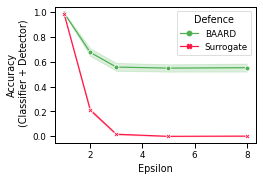

In [5]:
sns.set_context('paper')
plt.figure(figsize=(3.6, 2.5))

data = df[['epsilon', 'acc_on_adv_3', 'accs_on_surr']]
data = data.rename(columns={
        'epsilon': 'Epsilon',
        'acc_on_adv_3': 'BAARD',
        'accs_on_surr': 'Surrogate',
    })
data = data.melt('Epsilon', var_name='Defence', value_name='Accuracy')

ax1 = sns.lineplot(x='Epsilon', y='Accuracy', hue='Defence', style='Defence', data=data, markers=True, dashes=False, palette=cols)
ax1.set(ylabel="Accuracy\n (Classifier + Detector)")

plt.savefig('whitebox_mnist.pdf', format='pdf', dpi=1200, bbox_inches='tight')


In [6]:
paths = []
for i in range(5):
    path = os.path.join('..', 'results', 'result_{}'.format(i), 'cifar10_resnet', 'results', 'whitebox', 'cifar10_resnet_baard_whitebox.csv')
    paths.append(path)

print(*paths, sep='\n')

list_df = []
for p in paths:
    df = pd.read_csv(p)
    df = df.drop('Unnamed: 0', axis=1)
    list_df.append(df)

df = pd.concat(list_df, axis=0, ignore_index=True)
df['data'] = df['data'].map({'mnist': 'MNIST'})
df['model'] = df['model'].map({'dnn': 'DNN'})

df.head()

../results/result_0/cifar10_resnet/results/whitebox/cifar10_resnet_baard_whitebox.csv
../results/result_1/cifar10_resnet/results/whitebox/cifar10_resnet_baard_whitebox.csv
../results/result_2/cifar10_resnet/results/whitebox/cifar10_resnet_baard_whitebox.csv
../results/result_3/cifar10_resnet/results/whitebox/cifar10_resnet_baard_whitebox.csv
../results/result_4/cifar10_resnet/results/whitebox/cifar10_resnet_baard_whitebox.csv


,data,model,epsilon,acc_no_def,reject_by_s2,reject_by_s3,reject_by_baard,acc_on_adv_2,fpr_2,acc_on_adv_3,fpr_3,accs_on_surr,similarity
0,NaN,NaN,0.05,0.9205,0.0270,0.0260,0.0520,0.9225,0.0285,0.9275,0.0505,0.921,0.9360
1,NaN,NaN,0.10,0.8110,0.0275,0.0230,0.0495,0.8155,0.0285,0.8250,0.0505,0.812,0.9385
2,NaN,NaN,0.50,0.1150,0.0355,0.0765,0.1085,0.1440,0.0285,0.2170,0.0505,0.115,0.8880
3,NaN,NaN,1.00,0.0080,0.0485,0.0910,0.1335,0.0555,0.0285,0.1405,0.0505,0.008,0.8660
4,NaN,NaN,2.00,0.0000,0.0520,0.0925,0.1380,0.0520,0.0285,0.1380,0.0505,0.000,0.8620


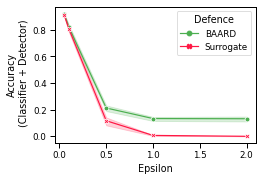

In [7]:
sns.set_context('paper')
plt.figure(figsize=(3.6, 2.5))

data = df[['epsilon', 'acc_on_adv_3', 'accs_on_surr']]
data = data.rename(columns={
        'epsilon': 'Epsilon',
        'acc_on_adv_3': 'BAARD',
        'accs_on_surr': 'Surrogate',
    })
data = data.melt('Epsilon', var_name='Defence', value_name='Accuracy')

ax1 = sns.lineplot(x='Epsilon', y='Accuracy', hue='Defence', style='Defence', data=data, markers=True, dashes=False, palette=cols)
ax1.set(ylabel="Accuracy\n (Classifier + Detector)")

plt.savefig('whitebox_cifar10_resnet.pdf', format='pdf', dpi=1200, bbox_inches='tight')